In [13]:
import os
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
from datetime import datetime
from SALib.sample.morris import morris as sample
from SALib.analyze import morris as analyze

In [14]:
problem = {
    "num_vars": 68,
    "names": [         
        "lat_ttime",   
        "can_max",     
        "esco",        
        "epco",        
        "cn3_swf",     
        "perco",       
        "pet_co",      
        "latq_co",     
        "cn_a",        
        "cn_b",        
        "cn_c",        
        "cn_d",        
        "gw_flo",      
        "dep_bot",     
        "dep_wt",      
        "no3_n",      
        "flo_dist",    
        "bf_max",      
        "alpha_bf",    
        "revap",       
        "rchg_dp",     
        "spec_yld",    
        "hl_no3n",    
        "flo_min",     
        "revap_min",   
        "fall_tmp",    
        "melt_tmp",    
        "melt_max_min",
        "melt_lag",    
        "snow_h2o",    
        "cov50",       
        "snow_init",  
        "dp",          
        "t_fc",        
        "lag",         
        "rad",         
        "dist",        
        "drain",       
        "pump",        
        "lat_kast",    
        "lai_noevap",  
        "sw_init",
        "surq_lag",
        "orgn_min",
        "n_uptake",
        "n_perc",
        "rsd_decomp",
        "msk_co1",
        "msk_co2",
        "msk_x",
        "nperco_lchtile",
        "evap_adj",
        "scoef",
        "denit_exp",
        "denit_frac",
        "n_fix_max",
        "rsd_decay",
        "rsd_cover",
        "surq_exp",
        "exp_co",
        "nitrate",
        "fr_hum_act",
        "hum_c_n",
        "ovn",
        "awc",
        "soil_k",
        "rsd_init",
        "fert",
    ],
    "bounds": [
        [0.51, 179.0],
        [0.01, 99.9],
        [0.01, 0.99],
        [0.01, 0.99],
        [0.01, 0.99],
        [0.01, 0.99],
        [0.71, 1.29],
        [0.01, 0.99],
        [30.0, 70.0],
        [50.0, 80.0],
        [70.0, 90.0],
        [80.0, 95.0],
        [0.0, 2.0],
        [5.0, 50.0],
        [2.0, 20.0],
        [0.1, 999.9],
        [10.0, 200.0],
        [0.11, 1.99],
        [0.01, 0.99],
        [0.021, 0.199], #revap
        [0.01, 0.99],
        [0.01, 0.49], #spec_yld
        [0.1, 199.9],
        [0.1, 49.0],
        [0.1, 49.0],
        [-4.9, 4.9],
        [-4.9, 4.9],
        [0.1, 9.9],  #melt_max_min
        [0.01, 0.99],
        [0.1, 499.9],
        [0.01, 0.90],
        [0, 1000], #snow_init
        [0.1, 5999.9],
        [0.1, 99.9],
        [0.1, 99.9],
        [3.1, 39.9],
        [7601, 29999],
        [10.1, 50.9],
        [0.1, 9.9],
        [0.02, 3.99],
        [0.1, 9.9],
        [0.01, 0.99],
        [1.1, 23.9],
        [0.0011, 0.0029], #orgn_min
        [0.1, 99.9],
        [0.01, 0.99],
        [0.021, 0.099],
        [0.1, 9.9],
        [0.1, 9.9],
        [0.01, 0.29],
        [0.01, 0.99], #nperco_lchtile
        [0.51, 0.99],
        [0.01, 0.99],
        [0.01, 2.99], #denit_exp
        [0.01, 0.99],
        [1.1, 19.9],
        [0.001, 0.049],
        [0.11, 0.49],
        [1.1, 2.9],
        [0.01, 0.99], #exp_co
        [0.1, 99.9],
        [0.01, 0.99],
        [8.1, 11.9],
        [0.011, 0.69],
        [0.01, 0.99],
        [0.1, 1999], #soil_k
        [1, 9999],
        [1, 1000]
    ]
}
X = np.loadtxt("SA_X.txt", float)
Y = np.loadtxt("SA_Y.txt", float)
Si = analyze.analyze(problem, X, Y, num_resamples=1000, num_levels=6, seed=1)
pd.DataFrame(Si).to_csv("SI.csv")

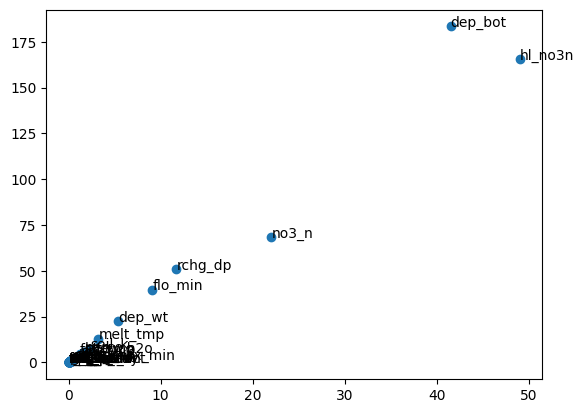

In [15]:
x=Si["mu_star"]
y=Si["sigma"]
label=Si["names"]
plt.scatter(x,y)
# plt.xlim(-0.3,10)
# plt.ylim(0,10)
for i in range(len(x)):
    if abs(x[i]) > 0.01:
        plt.annotate(label[i], xy=(x[i]+0.01, y[i]+0.01))